In [76]:
# Import project packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read data
df = pd.read_csv(r'C:\Users\matth\OneDrive\Desktop\Coding\Data Science Python\archive\movies.csv')

In [62]:
df.head()

,budget,company,name,genre,gross,rating,year,released,score,votes,director,writer,star,country,runtime
0,19000000.0,Warner Bros.,The Shining,Drama,46998772.0,R,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,146.0
1,4500000.0,Columbia Pictures,The Blue Lagoon,Adventure,58853106.0,R,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,104.0
2,18000000.0,Lucasfilm,Star Wars: Episode V - The Empire Strikes Back,Action,538375067.0,PG,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,124.0
3,3500000.0,Paramount Pictures,Airplane!,Comedy,83453539.0,PG,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,88.0
4,6000000.0,Orion Pictures,Caddyshack,Comedy,39846344.0,R,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,98.0


In [95]:
# Check for missing data and remove duplicates

for col in df.columns:
    pct_missing = np.mean(df [col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
df.drop_duplicates()

df.head()

budget - 0.2831246739697444%
company - 0.002217005738132499%
name - 0.0%
genre - 0.0%
gross - 0.02464788732394366%
rating - 0.010041731872717789%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
runtime - 0.0005216484089723526%


,budget,company,name,genre,gross,rating,year,released,score,votes,director,writer,star,country,runtime
5445,237000000.0,Twentieth Century Fox,Avatar,Action,2.847246e+09,PG-13,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,162.0
7445,356000000.0,Marvel Studios,Avengers: Endgame,Action,2.797501e+09,PG-13,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,181.0
3045,200000000.0,Twentieth Century Fox,Titanic,Drama,2.201647e+09,PG-13,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,194.0
6663,245000000.0,Lucasfilm,Star Wars: Episode VII - The Force Awakens,Action,2.069522e+09,PG-13,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,138.0
7244,321000000.0,Marvel Studios,Avengers: Infinity War,Action,2.048360e+09,PG-13,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,149.0


In [64]:
df.dtypes

budget      float64
company      object
name         object
genre        object
gross       float64
rating       object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
runtime     float64
dtype: object

In [97]:
df = df.dropna()
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

df['correct_year'] = df['released'].str.extract(pat='([0-9]{4})').astype(str)

df['company'].drop_duplicates().sort_values(ascending=False )

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [98]:
df.head()

,budget,company,name,genre,gross,rating,year,released,score,votes,director,writer,star,country,runtime,correct_year
5445,237000000,Twentieth Century Fox,Avatar,Action,2847246203,PG-13,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,162.0,2009
7445,356000000,Marvel Studios,Avengers: Endgame,Action,2797501328,PG-13,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,181.0,2019
3045,200000000,Twentieth Century Fox,Titanic,Drama,2201647264,PG-13,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,194.0,1997
6663,245000000,Lucasfilm,Star Wars: Episode VII - The Force Awakens,Action,2069521700,PG-13,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,138.0,2015
7244,321000000,Marvel Studios,Avengers: Infinity War,Action,2048359754,PG-13,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,149.0,2018


In [100]:


# Order data
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

<Axes: >

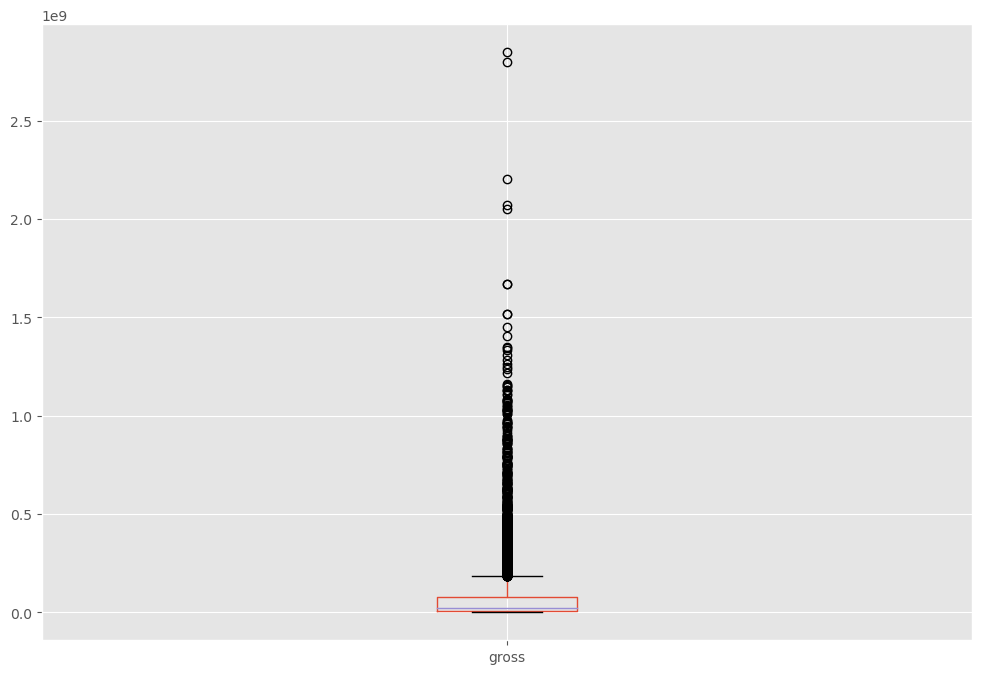

In [92]:
# Check for significant outliers

df.boxplot(column=['gross'])

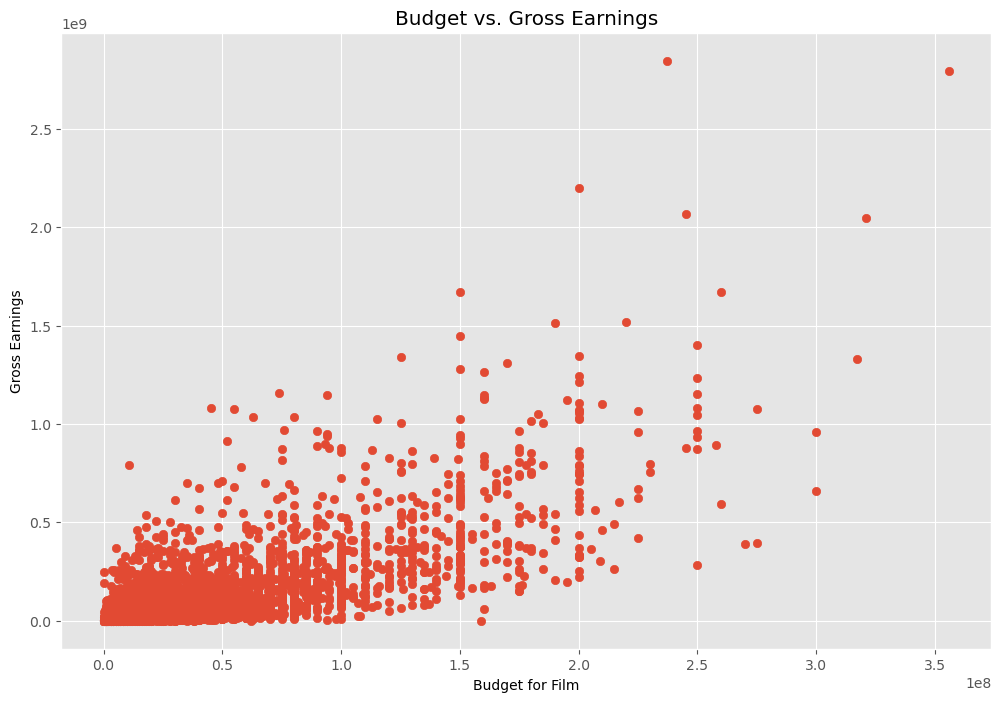

In [68]:
# Scatter plot with budget vs. gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs. Gross Earnings')

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')


            
plt.show()


In [69]:
df.head()

,budget,company,name,genre,gross,rating,year,released,score,votes,director,writer,star,country,runtime,correct_year
5445,237000000,Twentieth Century Fox,Avatar,Action,2847246203,PG-13,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,162.0,2009
7445,356000000,Marvel Studios,Avengers: Endgame,Action,2797501328,PG-13,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,181.0,2019
3045,200000000,Twentieth Century Fox,Titanic,Drama,2201647264,PG-13,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,194.0,1997
6663,245000000,Lucasfilm,Star Wars: Episode VII - The Force Awakens,Action,2069521700,PG-13,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,138.0,2015
7244,321000000,Marvel Studios,Avengers: Infinity War,Action,2048359754,PG-13,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

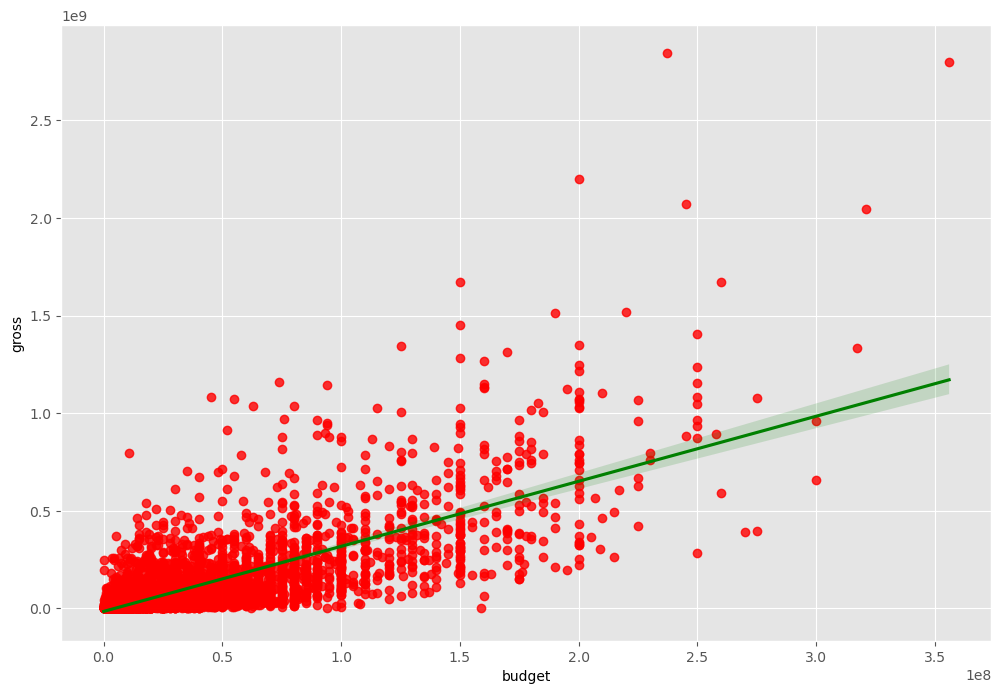

In [70]:
# Create Seaborn regplot

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "green"})

In [71]:
# Correlation matrix between all numeric columns

df.corr(method='pearson') #pearson, kendall, spearman

C:\Users\matth\AppData\Local\Temp\ipykernel_20452\4211989294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') #pearson, kendall, spearman


,budget,gross,year,score,votes,runtime
budget,1.000000,0.740247,0.327722,0.072001,0.439675,0.318695
gross,0.740247,1.000000,0.274321,0.222556,0.614751,0.275796
year,0.327722,0.274321,1.000000,0.056386,0.206021,0.075077
score,0.072001,0.222556,0.056386,1.000000,0.474256,0.414068
votes,0.439675,0.614751,0.206021,0.474256,1.000000,0.352303
runtime,0.318695,0.275796,0.075077,0.414068,0.352303,1.000000


C:\Users\matth\AppData\Local\Temp\ipykernel_20452\2708932002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


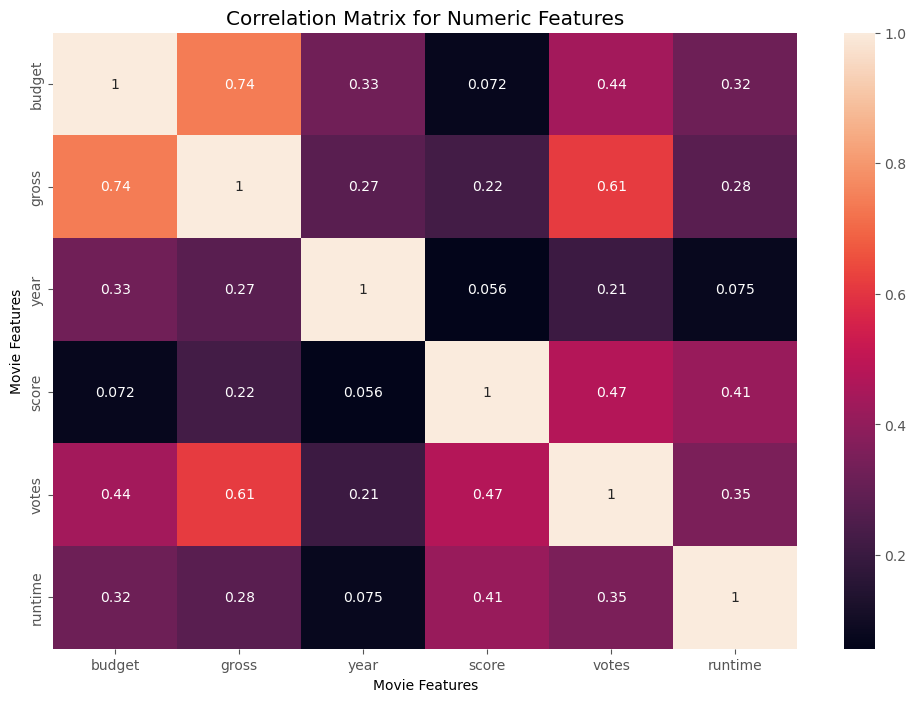

In [72]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [73]:
df.head()

,budget,company,name,genre,gross,rating,year,released,score,votes,director,writer,star,country,runtime,correct_year
5445,237000000,Twentieth Century Fox,Avatar,Action,2847246203,PG-13,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,162.0,2009
7445,356000000,Marvel Studios,Avengers: Endgame,Action,2797501328,PG-13,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,181.0,2019
3045,200000000,Twentieth Century Fox,Titanic,Drama,2201647264,PG-13,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,194.0,1997
6663,245000000,Lucasfilm,Star Wars: Episode VII - The Force Awakens,Action,2069521700,PG-13,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,138.0,2015
7244,321000000,Marvel Studios,Avengers: Infinity War,Action,2048359754,PG-13,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,149.0,2018


In [101]:
df_quantified = df

for col_name in df_quantified.columns:
    if(df_quantified[col_name].dtype == 'object'):
        df_quantified[col_name] = df_quantified[col_name].astype('category')
        df_quantified[col_name] = df_quantified[col_name].cat.codes
        
df_quantified.head()

,budget,company,name,genre,gross,rating,year,released,score,votes,director,writer,star,country,runtime,correct_year
5445,237000000,1382,386,0,2847246203,5,2009,527,7.8,1100000.0,785,1263,1534,47,162.0,29
7445,356000000,983,388,0,2797501328,5,2019,137,8.4,903000.0,105,513,1470,47,181.0,39
3045,200000000,1382,4909,6,2201647264,5,1997,534,7.8,1100000.0,785,1263,1073,47,194.0,17
6663,245000000,945,3643,0,2069521700,5,2015,529,7.8,876000.0,768,1806,356,47,138.0,35
7244,321000000,983,389,0,2048359754,5,2018,145,8.4,897000.0,105,513,1470,47,149.0,38


In [99]:
df.head()

,budget,company,name,genre,gross,rating,year,released,score,votes,director,writer,star,country,runtime,correct_year
5445,237000000,Twentieth Century Fox,Avatar,Action,2847246203,PG-13,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,162.0,2009
7445,356000000,Marvel Studios,Avengers: Endgame,Action,2797501328,PG-13,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,181.0,2019
3045,200000000,Twentieth Century Fox,Titanic,Drama,2201647264,PG-13,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,194.0,1997
6663,245000000,Lucasfilm,Star Wars: Episode VII - The Force Awakens,Action,2069521700,PG-13,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,138.0,2015
7244,321000000,Marvel Studios,Avengers: Infinity War,Action,2048359754,PG-13,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,149.0,2018


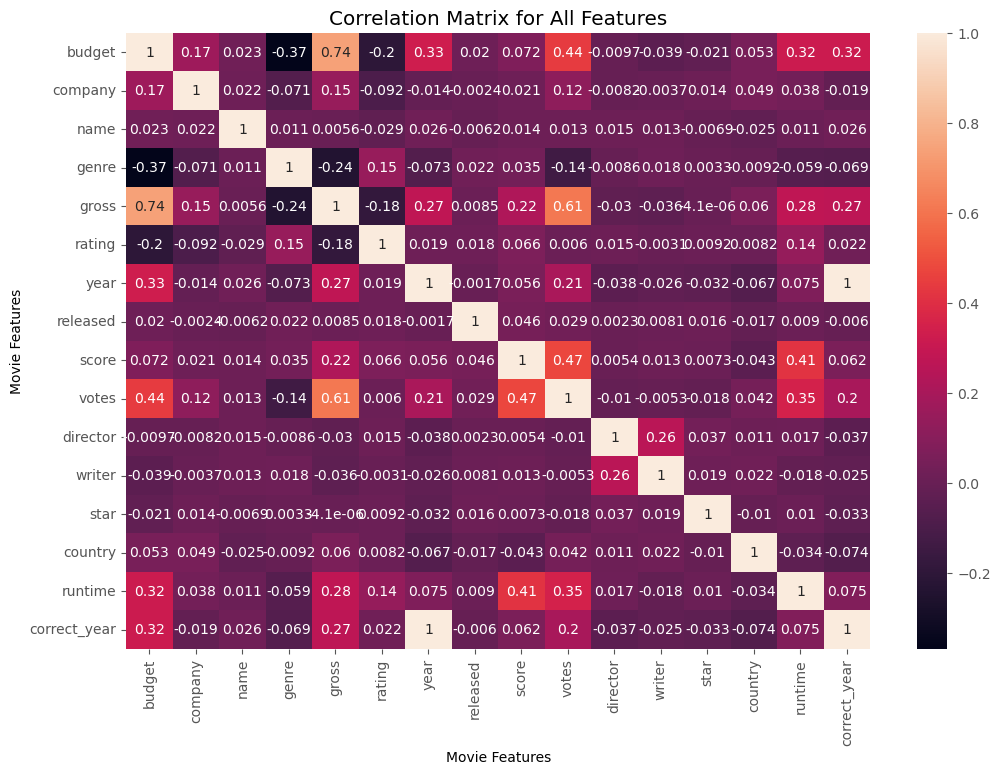

In [94]:
correlation_matrix = df_quantified.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for All Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [81]:
df_quantified.corr()

,budget,company,name,genre,gross,rating,year,released,score,votes,director,writer,star,country,runtime,correct_year
budget,1.000000,0.170235,0.023392,-0.368523,0.740247,-0.203946,0.327722,0.019952,0.072001,0.439675,-0.009662,-0.039466,-0.021473,0.052977,0.318695,0.320312
company,0.170235,1.000000,0.021697,-0.071334,0.149553,-0.092357,-0.014333,-0.002407,0.020656,0.118470,-0.008223,-0.003697,0.014082,0.048569,0.037585,-0.018806
name,0.023392,0.021697,1.000000,0.010996,0.005639,-0.029234,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.010850,0.025542
genre,-0.368523,-0.071334,0.010996,1.000000,-0.244101,0.147796,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.059237,-0.069147
gross,0.740247,0.149553,0.005639,-0.244101,1.000000,-0.181906,0.274321,0.008501,0.222556,0.614751,-0.029560,-0.035885,-0.000004,0.060078,0.275796,0.268721
rating,-0.203946,-0.092357,-0.029234,0.147796,-0.181906,1.000000,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,0.140792,0.022021
year,0.327722,-0.014333,0.025542,-0.073167,0.274321,0.019499,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.075077,0.998726
released,0.019952,-0.002407,-0.006152,0.022142,0.008501,0.018083,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.008975,-0.005989
score,0.072001,0.020656,0.014450,0.035106,0.222556,0.065983,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.414068,0.061923
votes,0.439675,0.118470,0.012615,-0.135990,0.614751,0.006031,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.352303,0.203098


In [103]:
correlation_mat = df_quantified.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget        budget          1.000000
              company         0.170235
              name            0.023392
              genre          -0.368523
              gross           0.740247
              rating         -0.203946
              year            0.327722
              released        0.019952
              score           0.072001
              votes           0.439675
              director       -0.009662
              writer         -0.039466
              star           -0.021473
              country         0.052977
              runtime         0.318695
              correct_year    0.320312
company       budget          0.170235
              company         1.000000
              name            0.021697
              genre          -0.071334
              gross           0.149553
              rating         -0.092357
              year           -0.014333
              released       -0.002407
              score           0.020656
              votes      

In [90]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.368523
genre         budget         -0.368523
              gross          -0.244101
gross         genre          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
gross         rating         -0.181906
rating        gross          -0.181906
genre         votes          -0.135990
votes         genre          -0.135990
rating        company        -0.092357
company       rating         -0.092357
country       correct_year   -0.073569
correct_year  country        -0.073569
year          genre          -0.073167
genre         year           -0.073167
              company        -0.071334
company       genre          -0.071334
correct_year  genre          -0.069147
genre         correct_year   -0.069147
country       year           -0.066748
year          country        -0.066748
runtime       genre          -0.059237
genre         runtime        -0.059237
score         country        -0.043051
country       score      

In [91]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes         gross           0.614751
gross         votes           0.614751
              budget          0.740247
budget        gross           0.740247
correct_year  year            0.998726
year          correct_year    0.998726
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
rating        rating          1.000000
gross         gross           1.000000
genre         genre           1.000000
name          name            1.000000
company       company         1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation